# 5.1 Logistic Regression Prediction

## Preparation

In [29]:
# Import the libraries we need for this lab

import torch.nn as nn
import torch
import matplotlib.pyplot as plt 

In [30]:
# Set the random seed

torch.manual_seed(1)

## Logistic Function

In [31]:
# Create some data
z = torch.arange(-100, 100, 0.1).view(-1, 1)

In [32]:
# Create a sigmond object
sig = nn.Sigmoid()

In [33]:
# Calculate the yhat
yhat = sig(z)
yhat

tensor([[0.],
        [0.],
        [0.],
        ...,
        [1.],
        [1.],
        [1.]])

Text(0, 0.5, 'yhat')

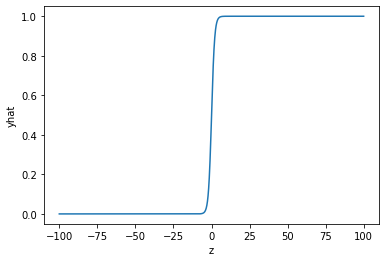

In [34]:
plt.plot(z.numpy(), yhat.numpy())
plt.xlabel('z')
plt.ylabel('yhat')

In [35]:
# Use torch.sigmond() to create a calcution
yhat = torch.sigmoid(z)

Text(0, 0.5, 'yhat')

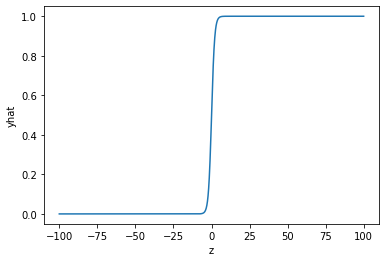

In [36]:
plt.plot(z.numpy(), yhat.numpy())
plt.xlabel('z')
plt.ylabel('yhat')

## nn.Sequential

In [37]:
# Create x and X tensor

x = torch.tensor([[1.0]])
X = torch.tensor([[1.0], [100]])
print('x = ', x)
print('X = ', X)

x =  tensor([[1.]])
X =  tensor([[  1.],
        [100.]])


In [38]:
# Create a sequential model
model = nn.Sequential(nn.Linear(1, 1), nn.Sigmoid())

In [39]:
yhat = model(x)

In [40]:
yhat

tensor([[0.5185]], grad_fn=<SigmoidBackward>)

## nn.Module

In [41]:
# build custom Modules
# Create Logistic regression custom class
class Logistic_regression(nn.Module):
    # Constructor
    def __init__(self, in_size=1):
        super(Logistic_regression, self).__init__()
        self.linear = nn.Linear(in_size, 1)
        
    #Prediction
    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

In [42]:
custom_model = Logistic_regression(1)
sequential_model = nn.Sequential(nn.Linear(1, 1), nn.Sigmoid())

## Making a Prediction

In [43]:
list(custom_model.parameters())

[Parameter containing:
 tensor([[-0.1939]], requires_grad=True),
 Parameter containing:
 tensor([0.4694], requires_grad=True)]

In [44]:
list(sequential_model.parameters())

[Parameter containing:
 tensor([[-0.9414]], requires_grad=True),
 Parameter containing:
 tensor([0.5997], requires_grad=True)]

In [46]:
# Create x and X tensor
x = torch.tensor([[1.0]])
X = torch.tensor([[-100], [0], [100.0]])

In [47]:
yhat_cm = custom_model(x)
yhat_cm

tensor([[0.5684]], grad_fn=<SigmoidBackward>)

In [48]:
yhat_sm = sequential_model(x)
yhat_sm

tensor([[0.4154]], grad_fn=<SigmoidBackward>)

In [49]:
Yhat_cm = custom_model(X)
Yhat_cm

tensor([[1.0000e+00],
        [6.1523e-01],
        [6.0890e-09]], grad_fn=<SigmoidBackward>)

In [50]:
Yhat_sm = sequential_model(X)
Yhat_sm

tensor([[1.0000],
        [0.6456],
        [0.0000]], grad_fn=<SigmoidBackward>)